<a href="https://colab.research.google.com/github/Eldossss/Eldossss/blob/main/intro_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [5]:
import numpy as np
from tensorflow.keras.models import Sequential # мы импортируем связку Sequential это класс
from tensorflow.keras.layers import Dense # Dense обозночает что наша нейронная сеть будет полносвязная

In [6]:
model = Sequential() # model -> обьект класса Sequential

In [7]:
model.add(Dense(2,input_dim = 2, use_bias = False))# тут мы добавляем невидный слой N1, N2 ;  с двумя инпутами точнее инпути у нас они векторы where row = 2 , column = 1
model.add(Dense(1,use_bias  = False)) # тут мы добавляем output с размером на 1, нейронное смещение у нас остается как - FALSE;

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
#N1 = x1*w1 + x2*w2 , N2 = X1*W3 + X2*W4 ;
# Y = N1*W5 + N2*W6

In [9]:
model.summary() # тут у нас написано что у спрятанного слоя 2 размероность а с ним связаны 4 параметра такие как - > w1,w2,w3,w4. А у оутпута только один размерность и связанные с ним числа параметров равен 2 такие как -> w5,w6

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
weights = model.get_weights() # тут мы можем увидеть все весы 4 на 2 весов в целом общих - 4 + 2 = 6 параметров . Обычно с помощью команды get_weigths -> даются рандомные веса , потом мы уже их уравниваем либо уменьшаем либо увеличиваем
print(weights)

[array([[ 0.6136427 ,  0.15303826],
       [-0.9018433 , -0.6990436 ]], dtype=float32), array([[0.27420068],
       [1.0480179 ]], dtype=float32)]


In [11]:
w1  = 0.42
w2 = 0.15
w3 = -0.56
w4 = 0.83
w5 = 0.93
w6 = 0.02
new_weight  = [np.array([[w1,w3],[w2,w4]]), np.array([[w5],[w6]])]
print(new_weight)
model.set_weights(new_weight)

[array([[ 0.42, -0.56],
       [ 0.15,  0.83]]), array([[0.93],
       [0.02]])]


In [12]:
x1 = 7.2
x2 = -5.8
x_train  = np.expand_dims(np.array([x1,x2]), 0) # почему мы пишем тут expand ? как бы расширяем наши примеры с характеристиками . потому что многие модели машинного обучение они как бы берут отдельный пример , и в каждом отдельном примере сущществуют сови характеристики , если мы просто напишем как x_train  = np.array([x1,x2])
# это у нас будет просто  одномерный массив из за этого модель не понимат либо это один пример с двумя характеристиками либо два примера с одной характеристикой . из за этого мы должный создавать двумерный массив
# с размерностью (1,2) .  Чтобы модель понимала что каждый row это прмиер и каждый column в этом примере это его характеристики
x_train.shape

(1, 2)

In [13]:
k = np.array([x1,x2])
k.shape # если просто вот так будет то это обозночает что это просто одномерный массив и не понятно сколько примеров и сколько характеристик

(2,)

In [14]:
print(x_train)

[[ 7.2 -5.8]]


In [15]:
print(k)

[ 7.2 -5.8]


In [16]:
y_linear  = model.predict(x_train) # это и есть то что мы умножали каждый инпут на весы и так далее , в целом этот метод делает только один тест .
print(y_linear)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[[1.8262998]]


**Теперь мы делаем тоже предик но в ручную . без метода predict()**


In [17]:
N1 = x1*w1 + x2*w2
N2 = x1*w3 + x2*w4
y_linear = N1*w5 + N2*w6
print(y_linear)

1.8263000000000003


In [18]:
# ответы почти одинаковые


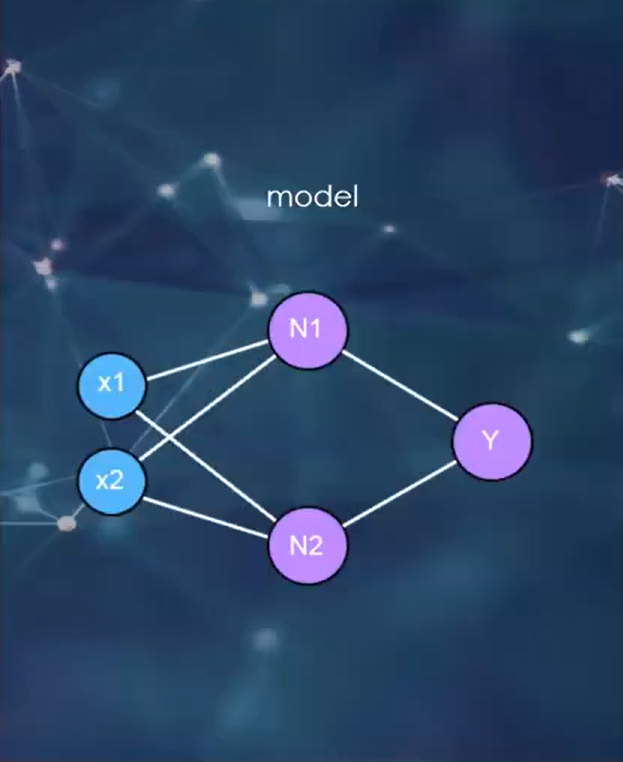

In [ ]:
# нейронные сети включают в себя функции не-линейности , из за этого мы вклчаем в каждый слой функцию не линейности чтобы мы не могли преоброзовать все матрицы в одну матрицу , например у нас есть простоая нейроннная сеть : N  = x*w1  , Y = N*w2 , тогда это можно расписать как
# Y(output) = X*w1*w2 , и заменить тут w1*w2 = w3 и зачем тогда нам нужны все слои и весы если можно сделать только одну и и выход он всегда будет одинаковым , из за этого мы на кждый слой включаем функцию не линейности
# если применить функцию не линейности у нас получиться : Y = f(g(x*w1)*w2 из за этого мы используем полсе умножения всех весов функции активации.
# простая функция активации это функция-выпярмитель f(x) = 0 if x < 0 : x if x >= 0 ; получается если на выходе получим число меньше нуля то он просто обнуляется , если больше тогда берем тот и оутпут